# Heart disease analysis Using different model

In the dataset we have some patient clinical report, We have to predict they have heart disease or not?

# Load the data

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv("heart.csv")

In [6]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# Data Description

 **1. age**: The person's age in years

 **2. sex**: The person's sex (1 = male, 0 = female)

 **3. cp**: Chest pain type 
            * 0: Typical angina: chest pain related decrease blood supply to the heart
            * 1: Atypical angina: chest pain not related to heart
            * 2: Non-anginal pain: typically esophageal spasms (non heart related)
            * 3: Asymptomatic: chest pain not showing signs of disease
            
**4. trestbps**: resting blood pressure (in mm Hg on admission to the hospital)

**5. chol**: The person's cholesterol measurement in mg/dl

**6. fbs**: the perdon's fasting blood sugar > 120 mg/dl. (1 = true; 0 = false)

**7. restecg**: Resting electrocardiographic results

     0: Nothing to note
     1: ST-T Wave abnormality
        * can range from mild symptoms to severe problems
        * signals non-normal heart beat
     2: Possible or definite left ventricular hypertrophy
        * Enlarged heart's main pumping chamber
        
**8. thalach**: Maximum heart rate achieved

**9. exang**: Exercise induced angina (1 = yes; 0 = no)

**10. oldpeak**: - ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more

**11. slope**: - the slope of the peak exercise ST segment
    * 0: Upsloping: better heart rate with excercise (uncommon)
    * 1: Flatsloping: minimal change (typical healthy heart)
    * 2: Downslopins: signs of unhealthy heart
    
**12. ca**: Number of major vessels (0-3) colored by flourosopy
    * colored vessel means the doctor can see the blood passing through
    * the more blood movement the better (no clots)
    
**13. thal**: Thalium stress result
    * 1,3: normal
    * 6: fixed defect: used to be defect but ok now
    * 7: reversable defect: no proper blood movement when excercising
    
**14. target**: Person have disease or not (1=yes, 0=no) (= the predicted attribute)

In [7]:
pd.set_option("display.float", "{:.2f}".format)
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00
mean,54.37,0.68,0.97,131.62,246.26,0.15,0.53,149.65,0.33,1.04,1.40,0.73,2.31,0.54
std,9.08,0.47,1.03,17.54,51.83,0.36,0.53,22.91,0.47,1.16,0.62,1.02,0.61,0.50
min,29.00,0.00,0.00,94.00,126.00,0.00,0.00,71.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,47.50,0.00,0.00,120.00,211.00,0.00,0.00,133.50,0.00,0.00,1.00,0.00,2.00,0.00
50%,55.00,1.00,1.00,130.00,240.00,0.00,1.00,153.00,0.00,0.80,1.00,0.00,2.00,1.00
75%,61.00,1.00,2.00,140.00,274.50,0.00,1.00,166.00,1.00,1.60,2.00,1.00,3.00,1.00
max,77.00,1.00,3.00,200.00,564.00,1.00,2.00,202.00,1.00,6.20,2.00,4.00,3.00,1.00


In [8]:
df.shape

(303, 14)

# Applying Model

# k nearest neighbor

In [9]:
from sklearn.preprocessing import StandardScaler
s = StandardScaler()

In [10]:
x = df.drop(columns="target",axis=1)
y = df.target

In [11]:
x = s.fit_transform(x)

In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [13]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((242, 13), (61, 13), (242,), (61,))

In [14]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,f1_score

In [15]:
from sklearn.neighbors import KNeighborsClassifier
for i in range(1,51):
     model = KNeighborsClassifier(n_neighbors=i)
     model.fit(x_train,y_train)
     y_pred = model.predict(x_test)
     print("if k is",i)
     print("accuracy:",accuracy_score(y_test,y_pred))

if k is 1
accuracy: 0.8524590163934426
if k is 2
accuracy: 0.819672131147541
if k is 3
accuracy: 0.8688524590163934
if k is 4
accuracy: 0.8852459016393442
if k is 5
accuracy: 0.9180327868852459
if k is 6
accuracy: 0.9344262295081968
if k is 7
accuracy: 0.9180327868852459
if k is 8
accuracy: 0.8524590163934426
if k is 9
accuracy: 0.8852459016393442
if k is 10
accuracy: 0.8852459016393442
if k is 11
accuracy: 0.8852459016393442
if k is 12
accuracy: 0.8688524590163934
if k is 13
accuracy: 0.8852459016393442
if k is 14
accuracy: 0.8688524590163934
if k is 15
accuracy: 0.9016393442622951
if k is 16
accuracy: 0.8852459016393442
if k is 17
accuracy: 0.8852459016393442
if k is 18
accuracy: 0.9016393442622951
if k is 19
accuracy: 0.8852459016393442
if k is 20
accuracy: 0.8852459016393442
if k is 21
accuracy: 0.8852459016393442
if k is 22
accuracy: 0.8852459016393442
if k is 23
accuracy: 0.8852459016393442
if k is 24
accuracy: 0.8852459016393442
if k is 25
accuracy: 0.8852459016393442
if k is 26

In [16]:
model = KNeighborsClassifier(n_neighbors=6)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
print("accuracy is",accuracy_score(y_test,y_pred))

accuracy is 0.9344262295081968


In [17]:
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       0.90      0.97      0.93        29\n           1       0.97      0.91      0.94        32\n\n    accuracy                           0.93        61\n   macro avg       0.93      0.94      0.93        61\nweighted avg       0.94      0.93      0.93        61\n'

In [18]:
confusion_matrix(y_test,y_pred)

array([[28,  1],
       [ 3, 29]], dtype=int64)

In [19]:
f1_score(y_test,y_pred)

0.9354838709677419

# Scalling The Data

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
StandardScaler = StandardScaler()  
columns_to_scale = ['age','trestbps','chol','thalach','oldpeak']
df[columns_to_scale] = StandardScaler.fit_transform(df[columns_to_scale])

In [21]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.95,1,3,0.76,-0.26,1,0,0.02,0,1.09,0,0,1,1
1,-1.92,1,2,-0.09,0.07,0,1,1.63,0,2.12,0,0,2,1
2,-1.47,0,1,-0.09,-0.82,0,0,0.98,0,0.31,2,0,2,1
3,0.18,1,1,-0.66,-0.20,0,1,1.24,0,-0.21,2,0,2,1
4,0.29,0,0,-0.66,2.08,0,1,0.58,1,-0.38,2,0,2,1


In [22]:
X= df.drop(['target'], axis=1)
y= df['target']

In [23]:
#devide Dataset into test and train
X_train, X_test,y_train, y_test=train_test_split(X,y,test_size=0.3,random_state=40)

In [24]:
#check those dataset
print('X_train-', X_train.size)
print('X_test-',X_test.size)
print('y_train-', y_train.size)
print('y_test-', y_test.size)

X_train- 2756
X_test- 1183
y_train- 212
y_test- 91


# Logistic regration

In [25]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

model1 = lr.fit(X_train,y_train)
prediction1 = model1.predict(X_test)

In [26]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,prediction1)
cm

array([[36,  4],
       [ 3, 48]], dtype=int64)

Details of confusion matricx
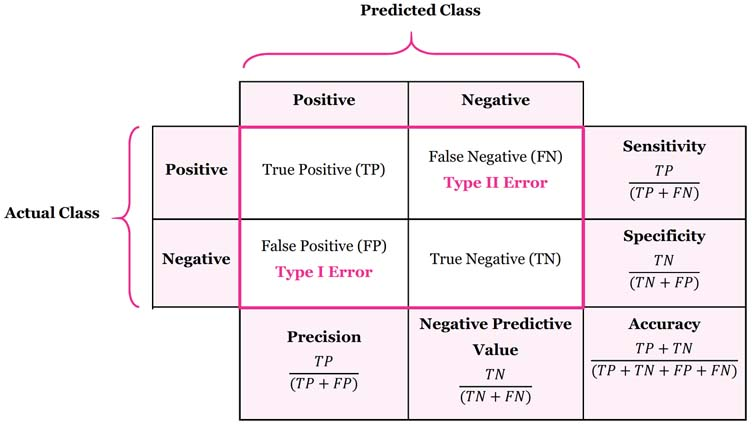

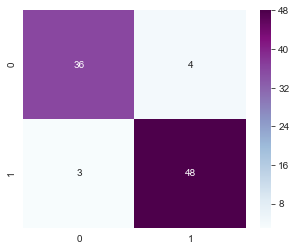

In [50]:
plt.subplots(figsize=(5, 4))
sns.heatmap(cm, annot=True, cmap="BuPu")


In [28]:
#Accuricy using matrics
TP=cm[0][0]
TN=cm[1][1]
FN=cm[1][0]
FP=cm[0][1]
print('Testing Accuracy:',(TP+TN)/(TP+TN+FN+FP))

Testing Accuracy: 0.9230769230769231


In [52]:
from sklearn.metrics import accuracy_score

accuracies = {}

acc = accuracy_score(y_test,prediction1)*100
accuracies['Logistic Regration'] = acc
acc

92.3076923076923

In [30]:
from sklearn.metrics import classification_report
print(classification_report(y_test,prediction1))

              precision    recall  f1-score   support

           0       0.92      0.90      0.91        40
           1       0.92      0.94      0.93        51

    accuracy                           0.92        91
   macro avg       0.92      0.92      0.92        91
weighted avg       0.92      0.92      0.92        91



# Dicision Tree

In [31]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
model2 = dtc.fit(X_train,y_train)
prediction2 = model2.predict(X_test)

In [32]:
cm2 = confusion_matrix(y_test,prediction2)
cm2

array([[32,  8],
       [14, 37]], dtype=int64)

In [53]:
acc = accuracy_score(y_test,prediction2)*100
accuracies['Dicision Tree'] = acc
acc

75.82417582417582

In [34]:
print(classification_report(y_test,prediction2))

              precision    recall  f1-score   support

           0       0.70      0.80      0.74        40
           1       0.82      0.73      0.77        51

    accuracy                           0.76        91
   macro avg       0.76      0.76      0.76        91
weighted avg       0.77      0.76      0.76        91



# Random Forest

In [35]:
from sklearn.ensemble import RandomForestClassifier

rfc=RandomForestClassifier()
model3 = rfc.fit(X_train, y_train)
prediction3 = model3.predict(X_test)
cm3 = confusion_matrix(y_test, prediction3)
cm3

array([[33,  7],
       [ 6, 45]], dtype=int64)

In [55]:
acc = accuracy_score(y_test, prediction3)*100
accuracies['Random Forest'] = acc
acc

85.71428571428571

In [37]:
print(classification_report(y_test, prediction3))

              precision    recall  f1-score   support

           0       0.85      0.82      0.84        40
           1       0.87      0.88      0.87        51

    accuracy                           0.86        91
   macro avg       0.86      0.85      0.85        91
weighted avg       0.86      0.86      0.86        91



# Support Vector machine

In [38]:
from sklearn.svm import SVC

svm=SVC()
model4=svm.fit(X_train,y_train)
prediction4=model4.predict(X_test)
cm4= confusion_matrix(y_test,prediction4)
cm4

array([[33,  7],
       [ 2, 49]], dtype=int64)

In [56]:
acc = accuracy_score(y_test, prediction4)*100
accuracies['Support Vector Machine'] = acc
acc

90.10989010989012

In [40]:
print(classification_report(y_test, prediction4))

              precision    recall  f1-score   support

           0       0.94      0.82      0.88        40
           1       0.88      0.96      0.92        51

    accuracy                           0.90        91
   macro avg       0.91      0.89      0.90        91
weighted avg       0.90      0.90      0.90        91



# Gaussion NB

In [41]:
from sklearn.naive_bayes import GaussianNB

NB = GaussianNB()
model5 = NB.fit(X_train, y_train)
prediction5 = model5.predict(X_test)
cm5= confusion_matrix(y_test, prediction5)
cm5

array([[35,  5],
       [ 6, 45]], dtype=int64)

In [57]:
acc = accuracy_score(y_test, prediction5)*100
accuracies['Gaussion NB'] = acc
acc

87.91208791208791

In [43]:
print(classification_report(y_test, prediction5))

              precision    recall  f1-score   support

           0       0.85      0.88      0.86        40
           1       0.90      0.88      0.89        51

    accuracy                           0.88        91
   macro avg       0.88      0.88      0.88        91
weighted avg       0.88      0.88      0.88        91



# K nearest neighbor

In [44]:
from sklearn.neighbors import KNeighborsClassifier

KNN = KNeighborsClassifier()
model6 = KNN.fit(X_train, y_train)
prediction6 = model6.predict(X_test)
cm6= confusion_matrix(y_test, prediction5)
cm6

array([[35,  5],
       [ 6, 45]], dtype=int64)

In [58]:
acc = accuracy_score(y_test, prediction6)*100
accuracies['K nearest neighbor'] = acc
acc

83.51648351648352

In [46]:
print(classification_report(y_test, prediction6))

              precision    recall  f1-score   support

           0       0.82      0.80      0.81        40
           1       0.85      0.86      0.85        51

    accuracy                           0.84        91
   macro avg       0.83      0.83      0.83        91
weighted avg       0.83      0.84      0.83        91



# Comparing Model

In [59]:
print('Logistic Regration - lr :', accuracy_score(y_test, prediction1) * 100)
print('Dicission Tree - dtc :', accuracy_score(y_test, prediction2) * 100)
print('Random Forrest - rfc :', accuracy_score(y_test, prediction3) * 100)
print('Support vector Machine - svm: ', accuracy_score(y_test, prediction4) * 100)
print('Gaussion NB - NB :', accuracy_score(y_test, prediction5) * 100)
print('K Nearest - KNN :', accuracy_score(y_test, prediction6) * 100)

Logistic Regration - lr : 92.3076923076923
Dicission Tree - dtc : 75.82417582417582
Random Forrest - rfc : 85.71428571428571
Support vector Machine - svm:  90.10989010989012
Gaussion NB - NB : 87.91208791208791
K Nearest - KNN : 83.51648351648352


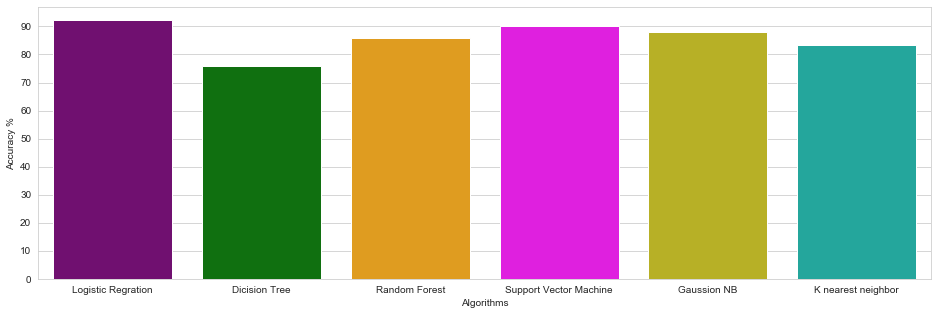

In [60]:
colors = ["purple", "green", "orange", "magenta","#CFC60E","#0FBBAE"]

sns.set_style("whitegrid")
plt.figure(figsize=(16,5))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors)
plt.show()

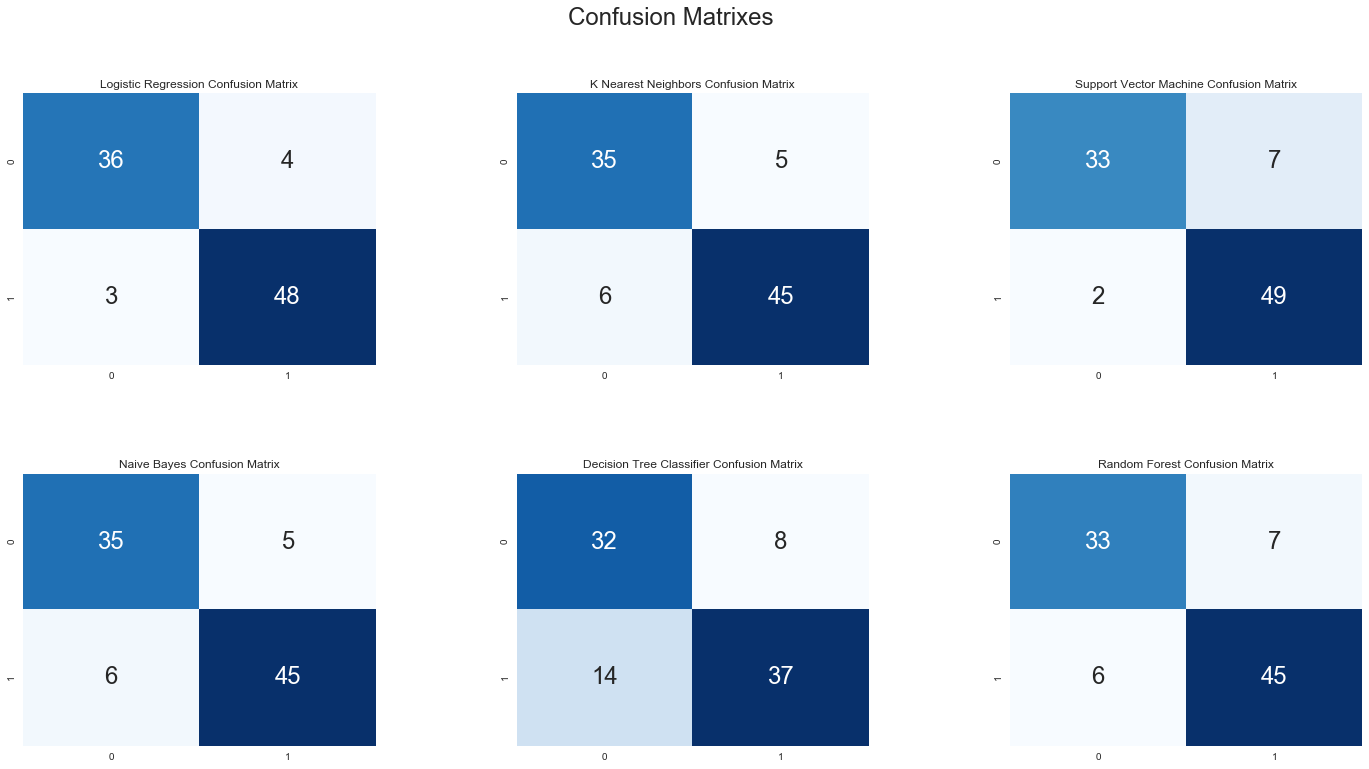

In [63]:
plt.figure(figsize=(24,12))

plt.suptitle("Confusion Matrixes",fontsize=24)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

plt.subplot(2,3,1)
plt.title("Logistic Regression Confusion Matrix")
sns.heatmap(cm,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,5)
plt.title("Decision Tree Classifier Confusion Matrix")
sns.heatmap(cm2,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,6)
plt.title("Random Forest Confusion Matrix")
sns.heatmap(cm3,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,3)
plt.title("Support Vector Machine Confusion Matrix")
sns.heatmap(cm4,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,4)
plt.title("Naive Bayes Confusion Matrix")
sns.heatmap(cm5,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,2)
plt.title("K Nearest Neighbors Confusion Matrix")
sns.heatmap(cm6,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})



plt.show()